# Drug EDA

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
drug = pd.read_csv("C:/Users/hemoa/OneDrive/바탕 화면/비어플/[25-1] Medical/dataset/preprocessing/#_filtered_drug_IC50.csv")
drug.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257522 entries, 0 to 257521
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Unnamed: 0      257522 non-null  int64  
 1   DATASET         257522 non-null  object 
 2   COSMIC_ID       257522 non-null  int64  
 3   ARXSPAN_ID      257522 non-null  object 
 4   DRUG_NAME       257522 non-null  object 
 5   IC50_PUBLISHED  257522 non-null  float64
dtypes: float64(1), int64(2), object(3)
memory usage: 11.8+ MB


In [24]:
# cell line (ARXSPAN_ID) 고유 개수
num_unique_cell_lines = drug["ARXSPAN_ID"].nunique()

# drug name 고유 개수
num_unique_drugs = drug["DRUG_NAME"].nunique()

print("Unique cell lines:", num_unique_cell_lines)
print("Unique drugs:", num_unique_drugs)

Unique cell lines: 694
Unique drugs: 368


In [ ]:
# cell line 당 Sample개수 확인하기.
cell_line_counts = drug.groupby("ARXSPAN_ID")["DRUG_NAME"].nunique()

cell_line_counts.describe()

count    694.000000
mean     314.599424
std       56.624540
min       23.000000
25%      299.000000
50%      334.000000
75%      343.000000
max      368.000000
Name: DRUG_NAME, dtype: float64

어떤 cell line은 368개 약물 전부에 대한 IC50 데이터가 있지만, 어떤 건 23개밖에 없는 경우도 있음

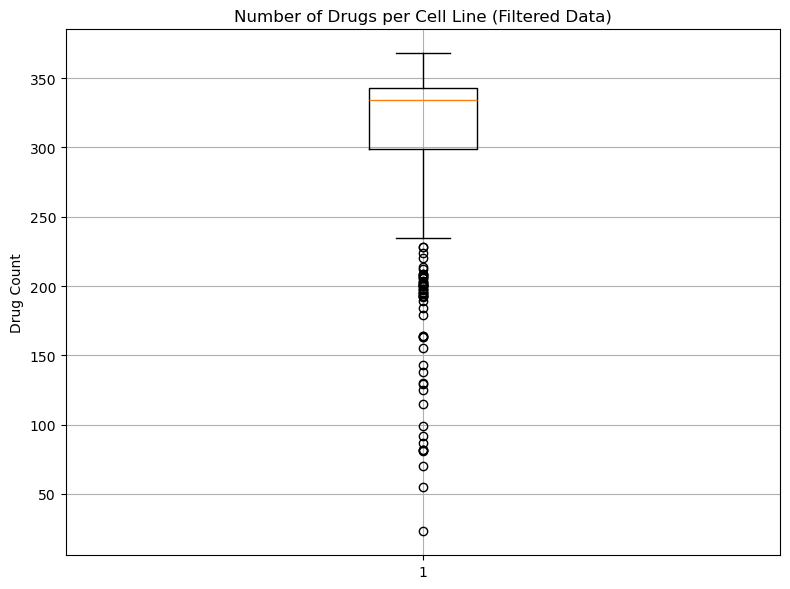

In [7]:
# Boxplot
plt.figure(figsize=(8, 6))
plt.boxplot(cell_line_counts.values, vert=True)
plt.title('Number of Drugs per Cell Line (Filtered Data)')
plt.ylabel('Drug Count')
plt.grid(True)
plt.tight_layout()
plt.show()


rule of thumb: 30~50개 미만이면 그 개체(class, entity 등)에 대해 모델이 제대로 학습하기 어렵다고 여김.  
이에 의해 sample수 50개 이하를 가진 cell line을 삭제하기로 함.

In [9]:
# 50개 미만 drug을 가진 cell line 목록 추출
cell_lines_to_keep = cell_line_counts[cell_line_counts >= 50].index

# 필터링된 IC50 데이터에서 해당 cell line만 유지
df_final = drug[drug["ARXSPAN_ID"].isin(cell_lines_to_keep)]

# 몇 개 남았는지 확인
df_final["ARXSPAN_ID"].nunique(), df_final.shape


(693, (257499, 6))

In [14]:
df_final["IC50_PUBLISHED"].describe()

count    257499.000000
mean        130.796037
std        1258.392611
min           0.000055
25%           2.542605
50%          15.411870
75%          71.607979
max      233209.856766
Name: IC50_PUBLISHED, dtype: float64

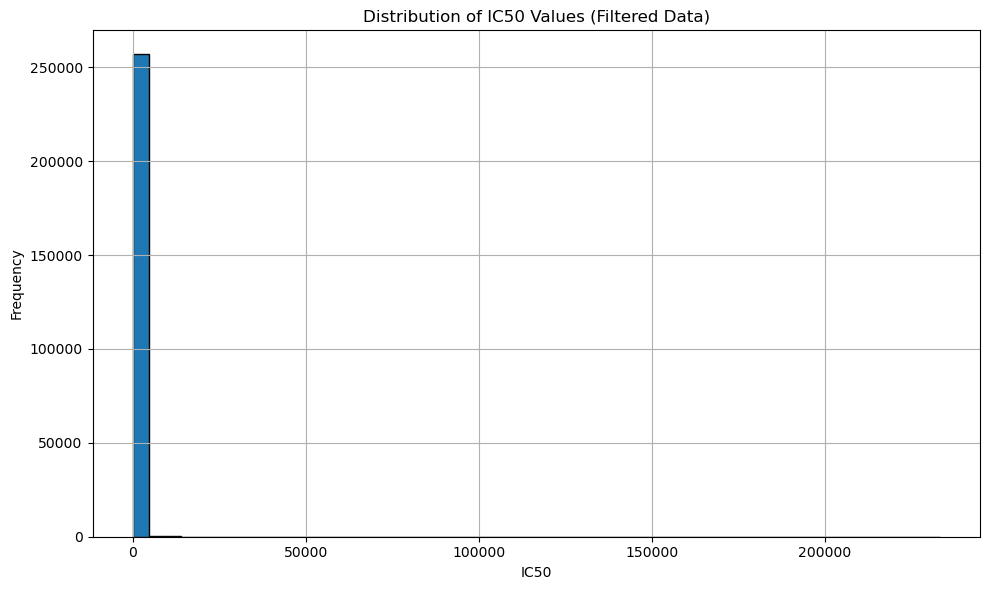

In [15]:
# IC50 값 분포 히스토그램 그리기
plt.figure(figsize=(10, 6))
plt.hist(df_final["IC50_PUBLISHED"], bins=50, edgecolor='black')
plt.title("Distribution of IC50 Values (Filtered Data)")
plt.xlabel("IC50")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()

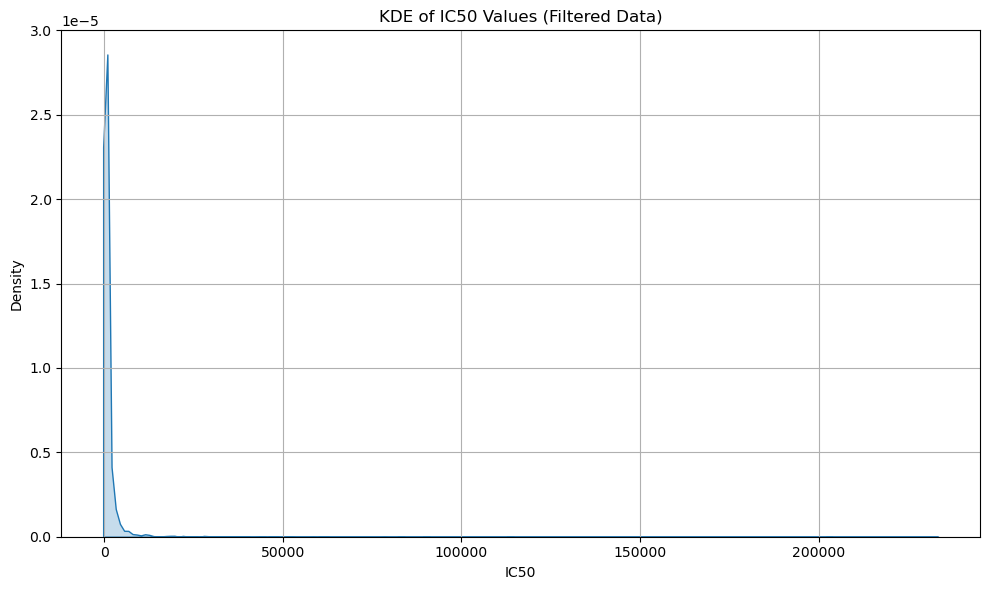

In [17]:
import seaborn as sns

# KDE plot for IC50 values
plt.figure(figsize=(10, 6))
sns.kdeplot(df_final["IC50_PUBLISHED"], fill=True)
plt.title("KDE of IC50 Values (Filtered Data)")
plt.xlabel("IC50")
plt.ylabel("Density")
plt.grid(True)
plt.tight_layout()
plt.show()

right-skewed 분포를 가지고 있음. => -log10 변환 진행. (pIC50으로 많이 진행)

In [20]:
# -log10(IC50) → pIC50 컬럼 생성 (0 값 없음 확인했으므로 필터링 제거)
df_final["pIC50"] = -np.log10(df_final["IC50_PUBLISHED"].astype(float))

C:\Users\hemoa\AppData\Local\Temp\ipykernel_22772\482740898.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final["pIC50"] = -np.log10(df_final["IC50_PUBLISHED"].astype(float))


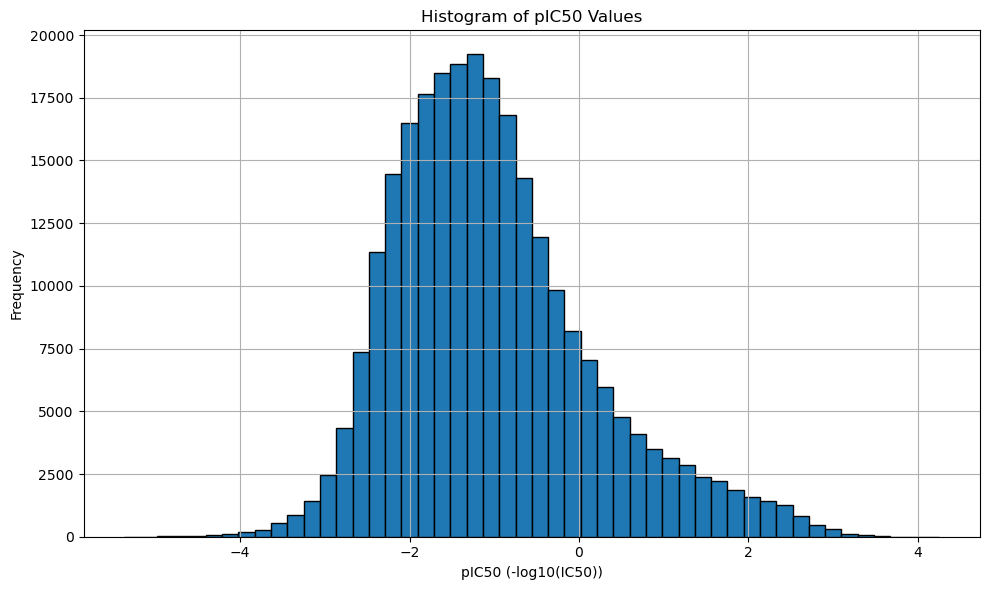

In [21]:
# 히스토그램 그리기
plt.figure(figsize=(10, 6))
plt.hist(df_final["pIC50"], bins=50, edgecolor='black')
plt.title("Histogram of pIC50 Values")
plt.xlabel("pIC50 (-log10(IC50))")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()

In [25]:
# cell line (ARXSPAN_ID) 고유 개수
num_unique_cell_lines = df_final["ARXSPAN_ID"].nunique()

# drug name 고유 개수
num_unique_drugs = df_final["DRUG_NAME"].nunique()

print("Unique cell lines:", num_unique_cell_lines)
print("Unique drugs:", num_unique_drugs)

Unique cell lines: 693
Unique drugs: 368


## gene expression data cell line 매핑

In [ ]:
# gene expression 파일
gene_expr_df = pd.read_csv("C:/Users/hemoa/OneDrive/바탕 화면/비어플/[25-1] Medical/dataset/preprocessing/#_filtered_CCLE_gene_expression.csv")

# 필터링된 cell line만 유지
gene_expr_filtered_final = gene_expr_df[gene_expr_df["Unnamed: 0"].isin(df_final["ARXSPAN_ID"].unique())]

# 결과 shape 확인
gene_expr_filtered_final.shape


(693, 2766)

In [22]:
# CSV 저장
df_final.to_csv("C:/Users/hemoa/OneDrive/바탕 화면/비어플/[25-1] Medical/dataset/preprocessing/#_final_filtered_ic50.csv", index=False)
gene_expr_filtered_final.to_csv("C:/Users/hemoa/OneDrive/바탕 화면/비어플/[25-1] Medical/dataset/preprocessing/#_final_filtered_gene_expression.csv", index=False)